<a href="https://colab.research.google.com/github/esferita006/Codigos_de_varias_materias/blob/main/Ejercicios_de_analisis_numerico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE ANALISIS NUMERICO</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de analisis numerico </i></h5>
</font>


# **Ejercicio 1**
Escribe un programa que, mediante el método de eliminación de Gauss sin pivoteo, resuelva un sistema de ecuaciones de $n \times n$. Toma en cuenta las restricciones y condiciones que se deben cumplir para poder utilizar este método.

Prueba tu programa para resolver el sistema de ecuaciones:

$$\left(\begin{array}{cccc} 1 & -1 & 0 & 5\\ 3 & -2 & 1 & -1 \\ 1 & 1 & 9 & 4\\ 1 & -7 & 2 & 3 \end{array}\right) \left(\begin{array}{c}x_1\\x_2\\x_3\\x_4\end{array}\right) = \left(\begin{array}{c}18\\8\\47\\32\end{array}\right)$$

In [ ]:
import numpy as np

def gauss_sin_pivoteo(A, b):
  """
  Resuelve un sistema de ecuaciones de n * n mediante el método de eliminación de Gauss sin pivoteo.

  Parámetros:
    A: Matriz de coeficientes del sistema.
    b: Vector de términos independientes del sistema.

  Devuelve:
    x: Vector de soluciones del sistema.
  """

  n = A.shape[0]

  # Eliminación de Gauss.
  for i in range(n - 1):
    for j in range(i + 1, n):
      if A[i, i] == 0:
        # No se puede resolver el sistema.
        raise ValueError("La matriz A tiene una diagonal principal nula.")

      factor = A[j, i] / A[i, i]
      A[j] = A[j] - factor * A[i]
      b[j] = b[j] - factor * b[i]

  # Retrosustitución.
  x = np.zeros(n)
  x[n - 1] = b[n - 1] / A[n - 1, n - 1]
  for i in range(n - 2, -1, -1):
    x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

  return x


def main():
  """
  Programa principal.
  """

  # Matriz de coeficientes y vector de términos independientes.
  A = np.array([[1, -1, 0, 5], [3, -2, 1, -1], [1, 1, 9, 4], [1, -7, 2, 3]])
  b = np.array([18, 8, 47, 32])

  # Solución del sistema.
  x = gauss_sin_pivoteo(A, b)

  # Impresión de la solución.
  print(x)


if __name__ == "__main__":
  main()


[ 1.1160043  -1.84640172  3.96670247  3.0075188 ]


# **Ejercicio 2**

La ecuación cartesiana de una circunferencia con centro en $(h,k)$ y radio $r>0$ es:

$$
\left(x-h\right)^2 + \left(y-k\right)^2 = r^2.
$$

Por otro lado, a partir de tres puntos no colineales se puede encontrar una única circunferencia que pasa por dichos puntos; es decir, mediante la ecuación anterior y dados tres puntos cartesianos $(x_1,y_1)$, $(x_2,y_2)$ y $(x_3,y_3)$ (no colineales) se pueden encontrar el centro $(h,k)$ y el radio $r$ de la circunferencia que pasa por dichos puntos.

Escribe un programa que, al ingresar las coordenadas de tres puntos no colineales, calcule el radio $r$ y las coordenadas $(h,k)$ de la circunferencia que pase por dichos puntos y grafique tanto la circunferencia como los puntos ingresados.

Ayuda: Observa que la ecuación del principio se puede escribir como

$$
Dx + Ey - F = x^2 + y^2,
$$

donde $D=2h$, $E=2k$ y $F = h^2 + k^2 - r^2$; mientras que $x$ e $y$ son las abscisas y ordenadas de algún punto cartesiano.

In [ ]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
def Obtener_radio_coordenadas(x_0, y_0, x_1, y_1, x_2, y_2):

    A = np.matrix([[x_0,y_0,-1 ],[x_1,y_1,-1],[x_2,y_2,-1]] )
    b = np.array([ma.pow(x_0,2) + ma.pow(y_0,2), ma.pow(x_1,2) + ma.pow(y_1,2) , ma.pow(x_2,2) + ma.pow(y_2,2)])


    #print("Matriz A : \n",A)
   #print("Vector b : \n", b)

    sol = np.linalg.solve(A,b)
    #print("Solucion del sistema: ", sol)
    D = sol[0]
    E  = sol[1]
    F = sol[2]
    h = D/2
    k = E/2
    r = ma.sqrt(ma.pow(h,2) + ma.pow(k,2) - F)

    #Graficación de Puntos
    fig, ax = plt.subplots()
    plt.scatter(x_0,y_0)
    plt.scatter(x_1,y_1)
    plt.scatter(x_2,y_2)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    #Graficación de circunferencia
    ax.add_patch(plt.Circle((h, k), r, color='r', alpha=0.5))
    ax.set_aspect('equal', adjustable='datalim')
    ax.plot()
    plt.show()

    return h,k,r

Ingresa la coordenada x del primer punto: 1
Ingresa la coordenada y del primer punto: 0
Ingresa la coordenada x del segundo punto: 0
Ingresa la coordenada y del segundo punto: 1
Ingresa la coordenada x del tercer punto: -1
Ingresa la coordenada y del tercer punto: 0


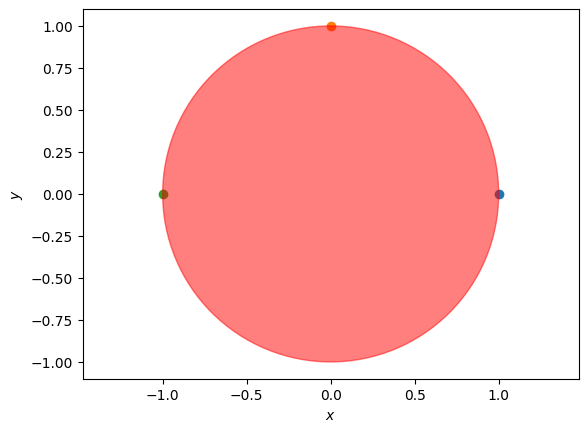

El radio de la circunferencia es 1.0
Las coordenadas del centro de la circunferencia son  (0.0, 0.0)


In [ ]:
#Primer trio de puntos
x_0 = int(input('Ingresa la coordenada x del primer punto: '))
y_0 = int(input('Ingresa la coordenada y del primer punto: '))
x_1 = int(input('Ingresa la coordenada x del segundo punto: '))
y_1 = int(input('Ingresa la coordenada y del segundo punto: '))
x_2 = int(input('Ingresa la coordenada x del tercer punto: '))
y_2 = int(input('Ingresa la coordenada y del tercer punto: '))

if (y_1 - y_0)/(x_1 - x_0) != (y_2 - y_1)/(x_2 - x_1):
    sol_1 = Obtener_radio_coordenadas(x_0, y_0, x_1, y_1, x_2, y_2)
    print(f'El radio de la circunferencia es {sol_1[2]}')
    print(f'Las coordenadas del centro de la circunferencia son  ({sol_1[0]}, {sol_1[1]})')
else:
    print('Los puntos ingresados son colineales')

Ingresa la coordenada x del primer punto: 3
Ingresa la coordenada y del primer punto: 9
Ingresa la coordenada x del segundo punto: 6
Ingresa la coordenada y del segundo punto: 8
Ingresa la coordenada x del tercer punto: 8
Ingresa la coordenada y del tercer punto: 4


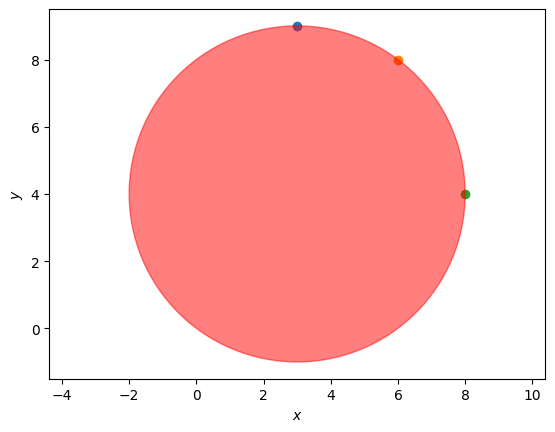

El radio de la circunferencia es 5.0
Las coordenadas del centro de la circunferencia son  (3.0, 4.0)


In [ ]:
#Segundo trio de puntos
x_0 = int(input('Ingresa la coordenada x del primer punto: '))
y_0 = int(input('Ingresa la coordenada y del primer punto: '))
x_1 = int(input('Ingresa la coordenada x del segundo punto: '))
y_1 = int(input('Ingresa la coordenada y del segundo punto: '))
x_2 = int(input('Ingresa la coordenada x del tercer punto: '))
y_2 = int(input('Ingresa la coordenada y del tercer punto: '))

if (y_1 - y_0)/(x_1 - x_0) != (y_2 - y_1)/(x_2 - x_1):
    sol_2 = Obtener_radio_coordenadas(x_0, y_0, x_1, y_1, x_2, y_2)
    print(f'El radio de la circunferencia es {sol_2[2]}')
    print(f'Las coordenadas del centro de la circunferencia son  ({sol_2[0]}, {sol_2[1]})')
else:
    print('Los puntos ingresados son colineales')

Ingresa la coordenada x del primer punto: 0
Ingresa la coordenada y del primer punto: 3
Ingresa la coordenada x del segundo punto: 2
Ingresa la coordenada y del segundo punto: 7
Ingresa la coordenada x del tercer punto: 4.9999
Ingresa la coordenada y del tercer punto: 13.0001


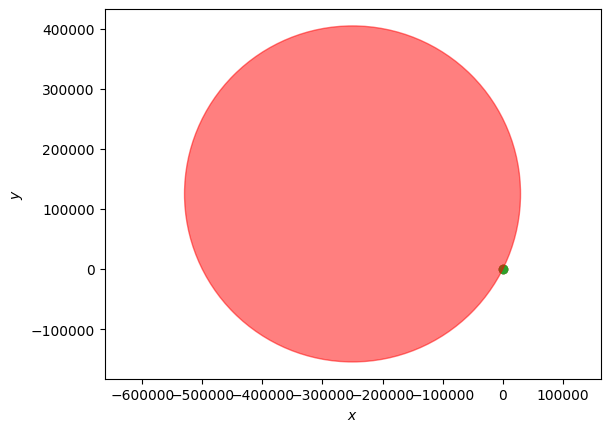

El radio de la circunferencia es 279511.47869427287
Las coordenadas del centro de la circunferencia son  (-250001.6667327514, 125006.33336637572)


In [ ]:
# Tercer  trio de puntos
x_0 = int(input('Ingresa la coordenada x del primer punto: '))
y_0 = int(input('Ingresa la coordenada y del primer punto: '))
x_1 = int(input('Ingresa la coordenada x del segundo punto: '))
y_1 = int(input('Ingresa la coordenada y del segundo punto: '))
x_2 = float(input('Ingresa la coordenada x del tercer punto: '))
y_2 = float(input('Ingresa la coordenada y del tercer punto: '))

if (y_1 - y_0)/(x_1 - x_0) != (y_2 - y_1)/(x_2 - x_1):
    sol_3 = Obtener_radio_coordenadas(x_0, y_0, x_1, y_1, x_2, y_2)
    print(f'El radio de la circunferencia es {sol_3[2]}')
    print(f'Las coordenadas del centro de la circunferencia son  ({sol_3[0]}, {sol_3[1]})')
else:
    print('Los puntos ingresados son colineales')

Prueba tu programa para las siguientes ternas de puntos:

> - <font color=blue> $(1,0)$, $(0,1)$, $(-1,0)$ </font>
> - <font color=blue> $(3,9)$, $(6,8)$, $(8,4)$  </font>
> - <font color=blue> $(0,3)$, $(2,7)$, $(4.9999,13.0001)$  </font>
    
¿Qué sucede con la última terna de puntos?, ¿por qué?

Para la primera y la segunda terna de puntos, el programa funcionará correctamente y calculará la circunferencia que pasa por esos puntos. Sin embargo, para la tercera terna de puntos, puede haber un problema debido a la precisión numérica. Los puntos en la tercera terna están muy cerca de ser colineales, lo que puede resultar en una división por casi cero al calcular el centro de la circunferencia. Esto puede dar como resultado resultados no confiables o errores numéricos debido a la falta de precisión en los cálculos

# **Ejercicio 3**
Construye dos rutinas que resuelvan sistemas de ecuaciones lineales mediante los métodos de factorización LU y factorización de Cholesky. Toma en consideración las restricciones y condiciones que se deben cumplir para cada método.

> - <font color=blue>Construye un programa que utilice las rutinas anteriores para resolver sistemas de ecuaciones, compara     el tiempo que toma cada proceso e imprímelo. Prueba este programa con el sistema:
    $$H^{(3)} x = (2,1,-2)^T,$$
    donde $H^{(3)}$ es la matriz de Hilbert de $3\times 3$. </font>



In [ ]:
pip install numpy scipy


In [ ]:
import numpy as np
import scipy.linalg as la
import time

# Rutina para resolver un sistema de ecuaciones mediante factorización LU
def solve_lu(A, b):
    LU, piv = la.lu_factor(A)  # Factorización LU de A
    x = la.lu_solve((LU, piv), b)  # Resolver el sistema
    return x

# Rutina para resolver un sistema de ecuaciones mediante factorización de Cholesky
def solve_cholesky(A, b):
    L = la.cholesky(A, lower=True)  # Factorización de Cholesky de A
    y = la.solve_triangular(L, b, lower=True)  # Resolver Ly = b
    x = la.solve_triangular(L.T, y)  # Resolver L^T x = y
    return x

# Programa principal
if __name__ == "__main__":
    # Definir el sistema de ecuaciones y la matriz de Hilbert
    b = np.array([2, 1, -2])
    n = 3  # Tamaño de la matriz de Hilbert
    H = np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])

    # Resolver el sistema utilizando factorización LU
    start_time = time.time()
    x_lu = solve_lu(H, b)
    lu_time = time.time() - start_time

    # Resolver el sistema utilizando factorización de Cholesky
    start_time = time.time()
    x_cholesky = solve_cholesky(H, b)
    cholesky_time = time.time() - start_time

    # Imprimir los resultados y tiempos de ejecución
    print("Resultado utilizando factorización LU:")
    print(x_lu)
    print("Tiempo de ejecución (LU):", lu_time, "segundos")

    print("\nResultado utilizando factorización de Cholesky:")
    print(x_cholesky)
    print("Tiempo de ejecución (Cholesky):", cholesky_time, "segundos")


Resultado utilizando factorización LU:
[ -78.  480. -480.]
Tiempo de ejecución (LU): 0.005524635314941406 segundos

Resultado utilizando factorización de Cholesky:
[ -78.  480. -480.]
Tiempo de ejecución (Cholesky): 0.0007250308990478516 segundos


# **Ejercicio 4**

La ecuación diferencial
$$
\frac{d^2}{dx^2}u = f(x),
$$

para $0<x<1$ y $f(x)$ conocida, se puede resolver de manera aproximada mediante el esquema numérico

$$
\frac{1}{h^2}\left(
\begin{array}{ccccc}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \cdots & 0 \\
0 & 1 & -2 & \cdots & 0 \\
\vdots& \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 1 & -2
\end{array}
\right)
\left(\begin{array}{c}
u_1\\u_2\\u_3\\ \vdots \\ u_n
\end{array}\right) =
\left(\begin{array}{c}
f_1\\f_2\\f_3\\ \vdots \\ f_n
\end{array}
\right).
$$

Donde el tamaño de la matriz del lado izquierdo de la ecuación es de $n\times n$. Considera $n=25$, $h=1/n$ y $x = ih$ para $i=1,2,\cdots,n$. Además considera $f_i = f(x_i)$ donde

$$
f(x) = 3x^2 - 3x
$$

Escribe un programa que mediante factorización LU o descomposición de Cholesky (asegúrate que la matriz en cuestión sea positiva definida) resuelva el esquema numérico resultante y encuentre el vector $U=\left(u_1,\cdots,u_n\right)^T$. Grafica los puntos $(x_1,u_1),(x_2,u_2),\cdots,(x_n,u_n)$. Escribe tus observaciones.

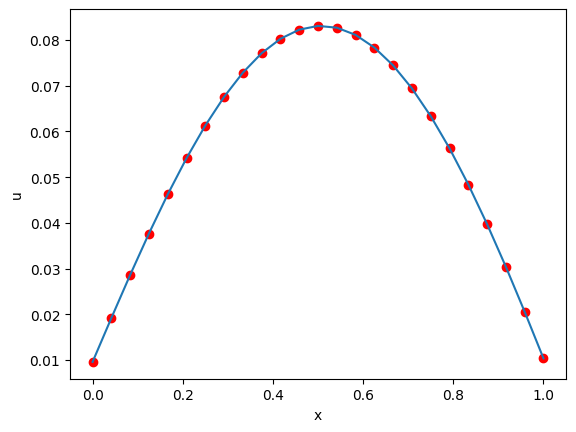

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def esquema_numerico(n, h, f):
  """
  Resuelve el esquema numérico para la ecuación diferencial
  \frac{d^2}{dx^2}u = f(x)

  Parámetros:
    n: Número de puntos de discretización.
    h: Paso de discretización.
    f: Función f(x).

  Devuelve:
    U: Vector de la solución aproximada.
  """

  # Matriz del esquema numérico.
  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      if i == j:
        A[i, i] = -2 / h**2
      elif i == j - 1 or i == j + 1:
        A[i, j] = 1 / h**2

  # Vector de valores de la función f(x).
  f_vec = np.zeros(n)
  for i in range(n):
    f_vec[i] = f(i * h)

  # Solución aproximada.
  U = np.linalg.solve(A, f_vec)

  return U


def main():
  """
  Programa principal.
  """

  # Parámetros del problema.
  n = 25
  h = 1 / n
  f = lambda x: 3 * x**2 - 3 * x

  # Solución aproximada.
  U = esquema_numerico(n, h, f)

  # Gráfica de la solución.
  x = np.linspace(0, 1, n)
  plt.plot(x, U)

  # Puntos en la gráfica.
  plt.scatter(x, U, marker="o", color="red")

  plt.xlabel("x")
  plt.ylabel("u")
  plt.show()

if __name__ == "__main__":
  main()
